In [1]:
%matplotlib inline
import warnings
warnings.filterwarnings("ignore")
import pandas
from sklearn.model_selection import train_test_split
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.preprocessing import OneHotEncoder
from sklearn.preprocessing import Normalizer
from scipy.sparse import hstack
from sklearn.naive_bayes import BernoulliNB,MultinomialNB
from sklearn.metrics import roc_curve, auc
from sklearn.metrics import roc_auc_score,confusion_matrix
import math
import matplotlib.pyplot as plt
import random
import seaborn as sns
import numpy as np

# ***Loading dataset***

In [2]:
! gdown --id 1OLZzxnsv8kp2wvawvH3uqyOGsus7IAh0

Downloading...
From: https://drive.google.com/uc?id=1OLZzxnsv8kp2wvawvH3uqyOGsus7IAh0
To: /content/preprocessed_data.csv
100% 124M/124M [00:01<00:00, 122MB/s] 


In [3]:
set1 = pandas.read_csv('preprocessed_data.csv',nrows=50000)
set2 = pandas.read_csv('preprocessed_data.csv',nrows=50000)

In [4]:
set1.head()

,school_state,teacher_prefix,project_grade_category,teacher_number_of_previously_posted_projects,project_is_approved,clean_categories,clean_subcategories,essay,price
0,ca,mrs,grades_prek_2,53,1,math_science,appliedsciences health_lifescience,i fortunate enough use fairy tale stem kits cl...,725.05
1,ut,ms,grades_3_5,4,1,specialneeds,specialneeds,imagine 8 9 years old you third grade classroo...,213.03
2,ca,mrs,grades_prek_2,10,1,literacy_language,literacy,having class 24 students comes diverse learner...,329.00
3,ga,mrs,grades_prek_2,2,1,appliedlearning,earlydevelopment,i recently read article giving students choice...,481.04
4,wa,mrs,grades_3_5,2,1,literacy_language,literacy,my students crave challenge eat obstacles brea...,17.74


In [5]:
y1=set1['project_is_approved'].values
x1=set1.drop(['project_is_approved'],axis=1)
y2=set2['project_is_approved'].values
x2=set2.drop(labels='project_is_approved',axis=1)
x2.head(1)

,school_state,teacher_prefix,project_grade_category,teacher_number_of_previously_posted_projects,clean_categories,clean_subcategories,essay,price
0,ca,mrs,grades_prek_2,53,math_science,appliedsciences health_lifescience,i fortunate enough use fairy tale stem kits cl...,725.05


# ***Splitting dataset***

In [6]:
x_train1,x_test1,y_train1,y_test1=train_test_split(x1,y1,test_size=0.33,stratify=y1)
x_train1,x_cv1,y_train1,y_cv1=train_test_split(x_train1,y_train1,test_size=0.33,stratify=y_train1)
x_train2,x_test2,y_train2,y_test2=train_test_split(x2,y2,test_size=0.33,stratify=y2)
x_train2,x_cv2,y_train2,y_cv2=train_test_split(x_train2,y_train2,test_size=0.33,stratify=y_train2)

# ***Encoding feature - essay (using BOW)***

In [7]:
vectorizer=CountVectorizer(min_df=10,ngram_range=(1,2),max_features=5000)
vectorizer.fit(x_train1['essay'].values)
x_train1_essay_bow=vectorizer.transform(x_train1['essay'].values)
x_cv1_essay_bow=vectorizer.transform(x_cv1['essay'].values)
x_test1_essay_bow=vectorizer.transform(x_test1['essay'].values)
print(x_train1_essay_bow.shape,x_cv1_essay_bow.shape,x_test1_essay_bow.shape)

(22445, 5000) (11055, 5000) (16500, 5000)


# ***Encoding feature - essay (using TFIDF)***

In [8]:
tfidf=TfidfVectorizer(min_df=10,ngram_range=(1,2),max_features=5000)
tfidf.fit(x_train2['essay'].values)
x_train2_essay_tfidf=tfidf.transform(x_train2['essay'].values)
x_cv2_essay_tfidf=tfidf.transform(x_cv2['essay'].values)
x_test2_essay_tfidf=tfidf.transform(x_test2['essay'].values)
print(x_train2_essay_tfidf.shape,x_cv2_essay_tfidf.shape,x_test2_essay_tfidf.shape)


(22445, 5000) (11055, 5000) (16500, 5000)


# ***Encoding feature - school_state***

In [9]:
#set1
encoder=OneHotEncoder()
encoder.fit(x_train1['school_state'].values.reshape(-1,1))
x_train1_ss_enc=encoder.transform(x_train1['school_state'].values.reshape(-1,1))
x_cv1_ss_enc=encoder.transform(x_cv1['school_state'].values.reshape(-1,1))
x_test1_ss_enc=encoder.transform(x_test1['school_state'].values.reshape(-1,1))
print(x_train1_ss_enc.shape,x_cv1_ss_enc.shape,x_test1_ss_enc.shape)

(22445, 51) (11055, 51) (16500, 51)


In [10]:
#set2
encoder=OneHotEncoder()
encoder.fit(x_train2['school_state'].values.reshape(-1,1))
x_train2_ss_enc=encoder.transform(x_train2['school_state'].values.reshape(-1,1))
x_cv2_ss_enc=encoder.transform(x_cv2['school_state'].values.reshape(-1,1))
x_test2_ss_enc=encoder.transform(x_test2['school_state'].values.reshape(-1,1))
print(x_train2_ss_enc.shape,x_cv2_ss_enc.shape,x_test2_ss_enc.shape)

(22445, 51) (11055, 51) (16500, 51)


# ***Encoding feature - teacher_prefix***

In [11]:
#set1
encoder=OneHotEncoder(handle_unknown='ignore')
encoder.fit(x_train1['teacher_prefix'].values.reshape(-1,1))
x_train1_tp_enc=encoder.transform(x_train1['teacher_prefix'].values.reshape(-1,1))
x_cv1_tp_enc=encoder.transform(x_cv1['teacher_prefix'].values.reshape(-1,1))
x_test1_tp_enc=encoder.transform(x_test1['teacher_prefix'].values.reshape(-1,1))
print(x_train1_tp_enc.shape,x_cv1_tp_enc.shape,x_test1_tp_enc.shape)

(22445, 5) (11055, 5) (16500, 5)


In [12]:
#set2
encoder=OneHotEncoder()
encoder.fit(x_train2['teacher_prefix'].values.reshape(-1,1))
x_train2_tp_enc=encoder.transform(x_train2['teacher_prefix'].values.reshape(-1,1))
x_cv2_tp_enc=encoder.transform(x_cv2['teacher_prefix'].values.reshape(-1,1))
x_test2_tp_enc=encoder.transform(x_test2['teacher_prefix'].values.reshape(-1,1))
print(x_train2_tp_enc.shape,x_cv2_tp_enc.shape,x_test2_tp_enc.shape)

(22445, 5) (11055, 5) (16500, 5)


# ***Encoding feature - project_grade_category***

In [13]:
#set1
encoder=OneHotEncoder()
encoder.fit(x_train1['project_grade_category'].values.reshape(-1,1))
x_train1_pgc_enc=encoder.transform(x_train1['project_grade_category'].values.reshape(-1,1))
x_cv1_pgc_enc=encoder.transform(x_cv1['project_grade_category'].values.reshape(-1,1))
x_test1_pgc_enc=encoder.transform(x_test1['project_grade_category'].values.reshape(-1,1))
print(x_train1_pgc_enc.shape,x_cv1_pgc_enc.shape,x_test1_pgc_enc.shape)

(22445, 4) (11055, 4) (16500, 4)


In [14]:
#set2
encoder=OneHotEncoder()
encoder.fit(x_train2['project_grade_category'].values.reshape(-1,1))
x_train2_pgc_enc=encoder.transform(x_train2['project_grade_category'].values.reshape(-1,1))
x_cv2_pgc_enc=encoder.transform(x_cv2['project_grade_category'].values.reshape(-1,1))
x_test2_pgc_enc=encoder.transform(x_test2['project_grade_category'].values.reshape(-1,1))
print(x_train2_pgc_enc.shape,x_cv2_pgc_enc.shape,x_test2_pgc_enc.shape)

(22445, 4) (11055, 4) (16500, 4)


# ***Encoding feature - clean_categories***

In [15]:
#set1
encoder=OneHotEncoder(handle_unknown='ignore')
encoder.fit(x_train1['clean_categories'].values.reshape(-1,1))
x_train1_cat_enc=encoder.transform(x_train1['clean_categories'].values.reshape(-1,1))
x_cv1_cat_enc=encoder.transform(x_cv1['clean_categories'].values.reshape(-1,1))
x_test1_cat_enc=encoder.transform(x_test1['clean_categories'].values.reshape(-1,1))
print(x_train1_cat_enc.shape,x_cv1_cat_enc.shape,x_test1_cat_enc.shape)

(22445, 44) (11055, 44) (16500, 44)


In [16]:
#set2
encoder=OneHotEncoder(handle_unknown='ignore')
encoder.fit(x_train2['clean_categories'].values.reshape(-1,1))
x_train2_cat_enc=encoder.transform(x_train2['clean_categories'].values.reshape(-1,1))
x_cv2_cat_enc=encoder.transform(x_cv2['clean_categories'].values.reshape(-1,1))
x_test2_cat_enc=encoder.transform(x_test2['clean_categories'].values.reshape(-1,1))
print(x_train2_cat_enc.shape,x_cv2_cat_enc.shape,x_test2_cat_enc.shape)

(22445, 44) (11055, 44) (16500, 44)


# ***Encoding feature - clean_subcategories***

In [17]:
#set1
encoder=OneHotEncoder(handle_unknown='ignore')
encoder.fit(x_train1['clean_subcategories'].values.reshape(-1,1))
x_train1_scat_enc=encoder.transform(x_train1['clean_subcategories'].values.reshape(-1,1))
x_cv1_scat_enc=encoder.transform(x_cv1['clean_subcategories'].values.reshape(-1,1))
x_test1_scat_enc=encoder.transform(x_test1['clean_subcategories'].values.reshape(-1,1))
print(x_train1_scat_enc.shape,x_cv1_scat_enc.shape,x_test1_scat_enc.shape)

(22445, 323) (11055, 323) (16500, 323)


In [18]:
#set2
encoder=OneHotEncoder(handle_unknown='ignore')
encoder.fit(x_train2['clean_subcategories'].values.reshape(-1,1))
x_train2_scat_enc=encoder.transform(x_train2['clean_subcategories'].values.reshape(-1,1))
x_cv2_scat_enc=encoder.transform(x_cv2['clean_subcategories'].values.reshape(-1,1))
x_test2_scat_enc=encoder.transform(x_test2['clean_subcategories'].values.reshape(-1,1))
print(x_train2_scat_enc.shape,x_cv2_scat_enc.shape,x_test2_scat_enc.shape)

(22445, 322) (11055, 322) (16500, 322)


# ***Encoding feature - teacher_number_of_previously_posted_projects***

In [19]:
#set1
normalizer=Normalizer()
normalizer.fit(x_train1['teacher_number_of_previously_posted_projects'].values.reshape(-1,1))
x_train1_tnpp_norm=normalizer.transform(x_train1['teacher_number_of_previously_posted_projects'].values.reshape(-1,1))
x_cv1_tnpp_norm=normalizer.transform(x_cv1['teacher_number_of_previously_posted_projects'].values.reshape(-1,1))
x_test1_tnpp_norm=normalizer.transform(x_test1['teacher_number_of_previously_posted_projects'].values.reshape(-1,1))
print(x_train1_tnpp_norm.shape,x_cv1_tnpp_norm.shape,x_test1_tnpp_norm.shape)

(22445, 1) (11055, 1) (16500, 1)


In [20]:
#set2
normalizer=Normalizer()
normalizer.fit(x_train2['teacher_number_of_previously_posted_projects'].values.reshape(-1,1))
x_train2_tnpp_norm=normalizer.transform(x_train2['teacher_number_of_previously_posted_projects'].values.reshape(-1,1))
x_cv2_tnpp_norm=normalizer.transform(x_cv2['teacher_number_of_previously_posted_projects'].values.reshape(-1,1))
x_test2_tnpp_norm=normalizer.transform(x_test2['teacher_number_of_previously_posted_projects'].values.reshape(-1,1))
print(x_train2_tnpp_norm.shape,x_cv2_tnpp_norm.shape,x_test2_tnpp_norm.shape)

(22445, 1) (11055, 1) (16500, 1)


# ***Encoding feature - Price***

In [21]:
#set1
normalizer=Normalizer()
normalizer.fit(x_train1['price'].values.reshape(-1,1))
x_train1_price_norm=normalizer.transform(x_train1['price'].values.reshape(-1,1))
x_cv1_price_norm=normalizer.transform(x_cv1['price'].values.reshape(-1,1))
x_test1_price_norm=normalizer.transform(x_test1['price'].values.reshape(-1,1))
print(x_train1_price_norm.shape,x_cv1_price_norm.shape,x_test1_price_norm.shape)

(22445, 1) (11055, 1) (16500, 1)


In [22]:
#set2
normalizer=Normalizer()
normalizer.fit(x_train2['price'].values.reshape(-1,1))
x_train2_price_norm=normalizer.transform(x_train2['price'].values.reshape(-1,1))
x_cv2_price_norm=normalizer.transform(x_cv2['price'].values.reshape(-1,1))
x_test2_price_norm=normalizer.transform(x_test2['price'].values.reshape(-1,1))
print(x_train2_price_norm.shape,x_cv2_price_norm.shape,x_test2_price_norm.shape)

(22445, 1) (11055, 1) (16500, 1)


# ***Horizontally stacking above encoded features***

In [23]:
#set1
x_tr1=hstack((x_train1_essay_bow,x_train1_ss_enc,x_train1_tp_enc,x_train1_pgc_enc,x_train1_cat_enc,x_train1_scat_enc,x_train1_tnpp_norm,x_train1_price_norm)).tocsr()
x_cd1=hstack((x_cv1_essay_bow,x_cv1_ss_enc,x_cv1_tp_enc,x_cv1_pgc_enc,x_cv1_cat_enc,x_cv1_scat_enc,x_cv1_tnpp_norm,x_cv1_price_norm)).tocsr()
x_te1=hstack((x_test1_essay_bow,x_test1_ss_enc,x_test1_tp_enc,x_test1_pgc_enc,x_test1_cat_enc,x_test1_scat_enc,x_test1_tnpp_norm,x_test1_price_norm)).tocsr()

#set2
x_tr2=hstack((x_train2_essay_tfidf,x_train2_ss_enc,x_train2_tp_enc,x_train2_pgc_enc,x_train2_cat_enc,x_train2_scat_enc,x_train2_tnpp_norm,x_train2_price_norm)).tocsr()
x_cd2=hstack((x_cv2_essay_tfidf,x_cv2_ss_enc,x_cv2_tp_enc,x_cv2_pgc_enc,x_cv2_cat_enc,x_cv2_scat_enc,x_cv2_tnpp_norm,x_cv2_price_norm)).tocsr()
x_te2=hstack((x_test2_essay_tfidf,x_test2_ss_enc,x_test2_tp_enc,x_test2_pgc_enc,x_test2_cat_enc,x_test2_scat_enc,x_test2_tnpp_norm,x_test2_price_norm)).tocsr()

print("final data matrix of set1")
print(x_tr1.shape,y_train1.shape)
print(x_cd1.shape,y_cv1.shape)
print(x_te1.shape,y_test1.shape)

print("\nfinal data matrix of set2")
print(x_tr2.shape,y_train2.shape)
print(x_cd2.shape,y_cv2.shape)
print(x_te2.shape,y_test2.shape)


final data matrix of set1
(22445, 5429) (22445,)
(11055, 5429) (11055,)
(16500, 5429) (16500,)

final data matrix of set2
(22445, 5428) (22445,)
(11055, 5428) (11055,)
(16500, 5428) (16500,)


# ***Applying Naive Bayes on set 1***

In [24]:
def batch_pred(clf,data):
    loop=data.shape[0] - data.shape[0]%1000
    y_prob=[]
    for i in range(0,loop,1000):
        y_prob.extend(clf.predict_proba(data[i:i+1000])[:,1])
    if data.shape[0]%1000 !=0:
        y_prob.extend(clf.predict_proba(data[loop:])[:,1])    
    return y_prob    

In [25]:
train1_auc=[]
cv1_auc=[]
a=[0.00001,0.0005, 0.0001,0.005,0.001,0.05,0.01,0.1,0.5,1,5,10,50,100]
for i in a:
    naive=MultinomialNB(alpha=i)
    naive.fit(x_tr1,y_train1)
    y_train1_pred=batch_pred(naive,x_tr1)
    y_cv1_pred=batch_pred(naive,x_cd1)
    train1_auc.append(roc_auc_score(y_train1,y_train1_pred))
    cv1_auc.append(roc_auc_score(y_cv1,y_cv1_pred))


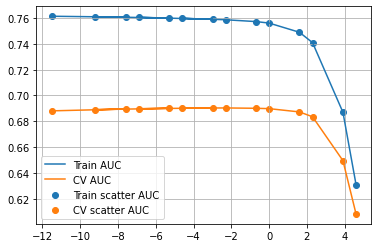

In [26]:
loga=[math.log(x) for x in a]
plt.plot(loga,train1_auc,label='Train AUC')
plt.plot(loga,cv1_auc,label='CV AUC')
plt.scatter(loga,train1_auc,label='Train scatter AUC')
plt.scatter(loga,cv1_auc,label='CV scatter AUC')
plt.legend()
plt.grid()
plt.show()

In [27]:
best_a=5
naive=MultinomialNB(alpha=best_a)
naive.fit(x_tr1,y_train1)
y_tr1_pred=batch_pred(naive,x_tr1)
y_test1_pred=batch_pred(naive,x_te1)
tr1_fpr,tr1_tpr,tr1_th=roc_curve(y_train1,y_tr1_pred)
te1_fpr,te1_tpr,te1_th=roc_curve(y_test1,y_test1_pred)

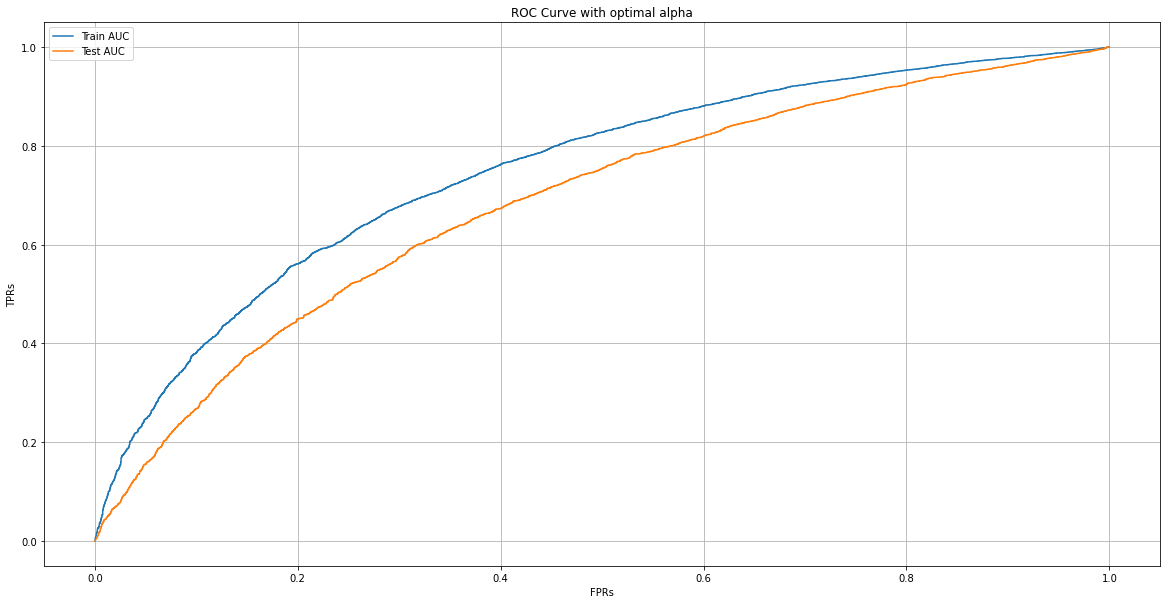

In [58]:
plt.figure(figsize=(20,10))
plt.plot(tr1_fpr,tr1_tpr,label='Train AUC')
plt.plot(te1_fpr,te1_tpr,label='Test AUC')
plt.grid()
plt.xlabel('FPRs')
plt.ylabel('TPRs')
plt.title('ROC Curve with optimal alpha')
plt.legend()
plt.show()

In [29]:
def best_threshold(thresholds,tprs,fprs):
    t=thresholds[np.argmax(tprs*(1-fprs))]
    return t
def predict_using_best_t(prob,threshold):
    predictions=[]
    for i in prob:
        if i<threshold:
            predictions.append(0)  
        else:
            predictions.append(1)
    return predictions            

0.8852716276412651


Text(0.5, 24.0, 'True Label')

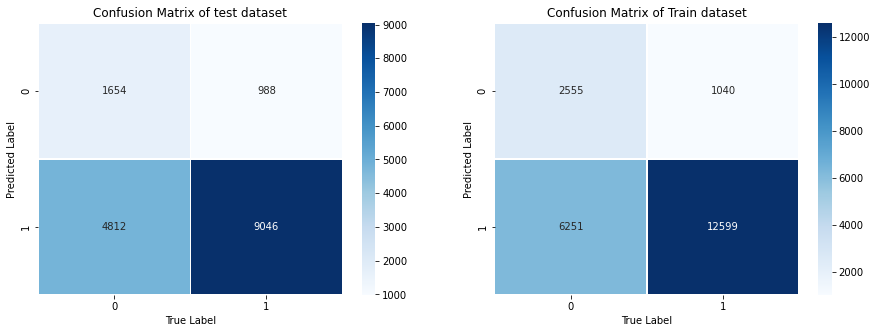

In [62]:
best_t=best_threshold(tr1_th,tr1_tpr,tr1_fpr)
print(best_t)
train1_cm=confusion_matrix(y_train1,predict_using_best_t(y_tr1_pred,best_t))
test1_cm=confusion_matrix(y_test1,predict_using_best_t(y_test1_pred,best_t))
plt.figure(figsize=(15,5))
plt.subplot(121)
plt.title('Confusion Matrix of test dataset')
sns.heatmap(test1_cm,annot=True,fmt="d",cmap='Blues',cbar=True,linewidths=.5)
plt.ylabel('Predicted Label')
plt.xlabel('True Label')
plt.subplot(122)
plt.title('Confusion Matrix of Train dataset')
sns.heatmap(train1_cm,annot=True,fmt="d",cmap='Blues',cbar=True,linewidths=.5)
plt.ylabel('Predicted Label')
plt.xlabel('True Label')

In [54]:
indices=np.argsort(naive.feature_log_prob_[0])[-20:]
print(indices)
l=[]
for i in indices:
    if i<5000: 
        l.append(vectorizer.get_feature_names()[i])
l.append('teacher_number_of_previously_posted_projects')
print('Top 20 features are :',l)    

[4951   93  804 4878 2840 4776 2617 2825 5428 2821 4403 4453 1901 2927
 2295  711 2806 2347 3610 4035]
Top 20 features are : ['year', 'able', 'come', 'work', 'need', 'we', 'many', 'nannan', 'my students', 'the', 'they', 'help', 'not', 'learn', 'classroom', 'my', 'learning', 'school', 'students', 'teacher_number_of_previously_posted_projects']


# ***Applying Naive Bayes on SET 2***

In [55]:
train2_auc=[]
cv2_auc=[]
a=[0.00001,0.0005, 0.0001,0.005,0.001,0.05,0.01,0.1,0.5,1,5,10,50,100]
for i in a:
    naive=MultinomialNB(alpha=i)
    naive.fit(x_tr2,y_train2)
    y_train2_pred=batch_pred(naive,x_tr2)
    y_cv2_pred=batch_pred(naive,x_cd2)
    train2_auc.append(roc_auc_score(y_train2,y_train2_pred))
    cv2_auc.append(roc_auc_score(y_cv2,y_cv2_pred))

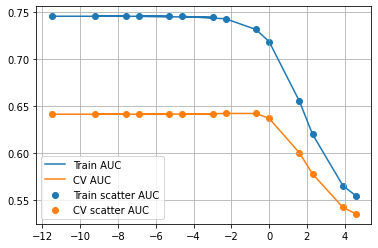

In [56]:
plt.plot(loga,train2_auc,label='Train AUC')
plt.plot(loga,cv2_auc,label='CV AUC')
plt.scatter(loga,train2_auc,label='Train scatter AUC')
plt.scatter(loga,cv2_auc,label='CV scatter AUC')
plt.legend()
plt.grid()
plt.show()

In [57]:
best_a2=0.5
naive=MultinomialNB(alpha=best_a2)
naive.fit(x_tr2,y_train2)
y_tr2_pred=batch_pred(naive,x_tr2)
y_test2_pred=batch_pred(naive,x_te2)
tr2_fpr,tr2_tpr,tr2_th=roc_curve(y_train2,y_tr2_pred)
te2_fpr,te2_tpr,te2_th=roc_curve(y_test2,y_test2_pred)

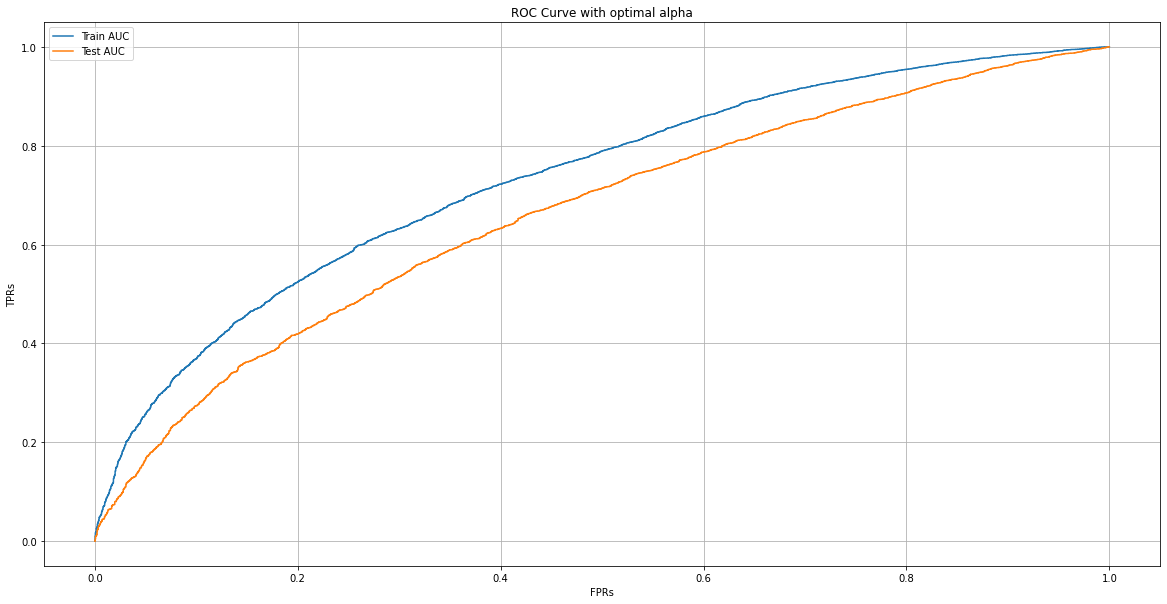

In [59]:
plt.figure(figsize=(20,10))
plt.plot(tr2_fpr,tr2_tpr,label='Train AUC')
plt.plot(te2_fpr,te2_tpr,label='Test AUC')
plt.grid()
plt.xlabel('FPRs')
plt.ylabel('TPRs')
plt.title('ROC Curve with optimal alpha')
plt.legend()
plt.show()

0.8577516107794158


Text(0.5, 24.0, 'True Label')

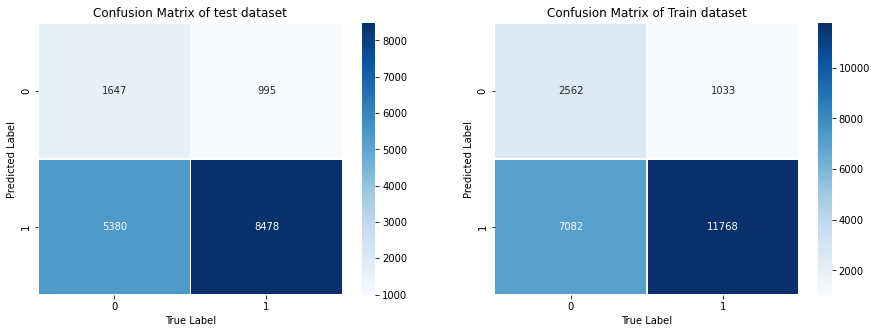

In [63]:
best_t2=best_threshold(tr2_th,tr2_tpr,tr2_fpr)
print(best_t2)
train2_cm=confusion_matrix(y_train2,predict_using_best_t(y_tr2_pred,best_t2))
test2_cm=confusion_matrix(y_test2,predict_using_best_t(y_test2_pred,best_t2))
plt.figure(figsize=(15,5))
plt.subplot(121)
plt.title('Confusion Matrix of test dataset')
sns.heatmap(test2_cm,annot=True,fmt="d",cmap='Blues',cbar=True,linewidths=.5)
plt.ylabel('Predicted Label')
plt.xlabel('True Label')
plt.subplot(122)
plt.title('Confusion Matrix of Train dataset')
sns.heatmap(train2_cm,annot=True,fmt="d",cmap='Blues',cbar=True,linewidths=.5)
plt.ylabel('Predicted Label')
plt.xlabel('True Label')

# ***CONCLUSION***

In [65]:
from prettytable import PrettyTable
x = PrettyTable()
x.field_names = ["Vectorizer", "Model", "Hyperparameter-Alpha", "Train AUC",
"Test AUC"]
x.add_row(["BOW","Brute",5,auc(tr1_fpr,tr1_tpr),auc(te1_fpr,te1_tpr)])
x.add_row(["TFIDF","Brute",0.5,auc(tr2_fpr,tr2_tpr),auc(te2_fpr,te2_tpr)])
print(x)


+------------+-------+----------------------+--------------------+--------------------+
| Vectorizer | Model | Hyperparameter-Alpha |     Train AUC      |      Test AUC      |
+------------+-------+----------------------+--------------------+--------------------+
|    BOW     | Brute |          5           | 0.7489860659699037 | 0.6839126583911719 |
|   TFIDF    | Brute |         0.5          | 0.7318463383051172 | 0.6622104881468347 |
+------------+-------+----------------------+--------------------+--------------------+
